In [1]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, factor=.3, noise=.05, random_state=1)

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[:,0],X[:,1], c=y, cmap="RdBu")
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
from urllib.request import urlretrieve
url = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch12/neuralnet.py"
urlretrieve(url, 'neuralnet.py' )

('neuralnet.py', <http.client.HTTPMessage at 0x12265a8d0>)

In [5]:
from neuralnet import NeuralNetMLP

In [6]:
n_epochs = 200 # original
#%%time
mlp = NeuralNetMLP(n_hidden=3,   # number of hidden units
                  l2=0.001,       # Lambda value for L2 regularization
                  epochs=n_epochs,
                  eta=0.05,    # learning rate
                  minibatch_size=160,
                  shuffle=True,
                  seed=1)

mlp.fit(X_train=X_train[:1800], 
       y_train=y_train[:1800],
       X_valid=X_train[1800:],
       y_valid=y_train[1800:])

/Users/sarakhanjani/Downloads/neuralnet.py:256: RuntimeWarning: invalid value encountered in double_scalars
  X_valid.shape[0])
200/200 | Cost: 110.36 | Train/Valid Acc.: 88.12%/nan% 

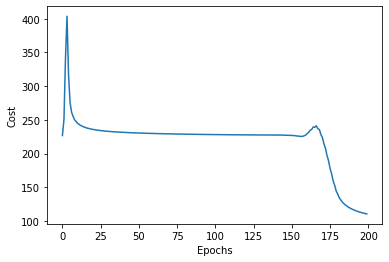

In [9]:
plt.plot(range(mlp.epochs), mlp.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

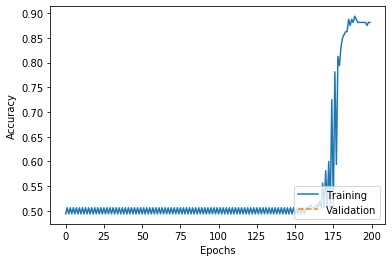

In [11]:
plt.plot(range(mlp.epochs), mlp.eval_['train_acc'], 
         label='Training')
plt.plot(range(mlp.epochs), mlp.eval_['valid_acc'], 
         label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('images/12_08.png', dpi=300)
plt.show()

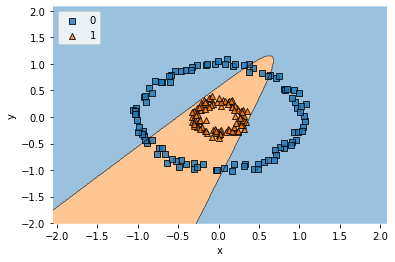

In [13]:
c

In [14]:
n_epochs = 200 # original
#%%time
mlp2 = NeuralNetMLP(n_hidden=4,   # number of hidden units
                  l2=0.001,       # Lambda value for L2 regularization
                  epochs=n_epochs,
                  eta=0.05,    # learning rate
                  minibatch_size=160,
                  shuffle=True,
                  seed=1)

mlp2.fit(X_train=X_train[:1800], 
       y_train=y_train[:1800],
       X_valid=X_train[1800:],
       y_valid=y_train[1800:])

/Users/sarakhanjani/Downloads/neuralnet.py:256: RuntimeWarning: invalid value encountered in double_scalars
  X_valid.shape[0])
200/200 | Cost: 6.88 | Train/Valid Acc.: 100.00%/nan%  

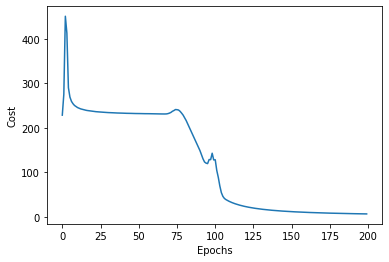

In [15]:
plt.plot(range(mlp2.epochs), mlp2.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
#plt.savefig('images/12_07.png', dpi=300)
plt.show()

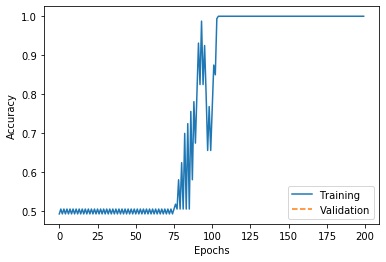

In [16]:
plt.plot(range(mlp2.epochs), mlp2.eval_['train_acc'], 
         label='Training')
plt.plot(range(mlp2.epochs), mlp2.eval_['valid_acc'], 
         label='Validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('images/12_08.png', dpi=300)
plt.show()

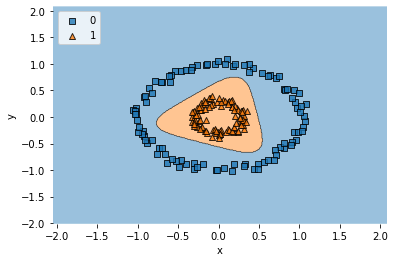

In [17]:
#from matplotlib import plot_decision_regions 
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=mlp2)
plt.xlabel('x') 
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# This dataset has a more pronounced nonlinearity
y_train = np.array([1.0, 4.3, 7.1,
                    10.0, 10.0, 10.3,
                    9.6, 8.4, 7.0,
                    5.0])


In [23]:
print(y_train)

[ 1.   4.3  7.1 10.  10.  10.3  9.6  8.4  7.   5. ]


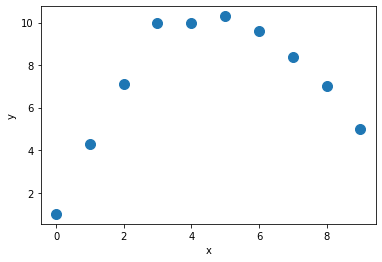

In [25]:
#Peform the linear regression using tensorflow (Chapter 13) 

# This dataset has a more pronounced nonlinearity
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 4.3, 7.1,
                    10.0, 10.0, 10.3,
                    9.6, 8.4, 7.0,
                    5.0])
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))

In [27]:

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w*x + self.b


model = MyModel()

model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


## testing the function:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [29]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [30]:
tf.random.set_seed(1)

num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))


ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))

Epoch    0 Step  0 Loss 92.1600
Epoch   10 Step 100 Loss 0.0004
Epoch   20 Step 200 Loss 49.2550
Epoch   30 Step 300 Loss 0.9439
Epoch   40 Step 400 Loss 37.1278
Epoch   50 Step 500 Loss 30.4330
Epoch   60 Step 600 Loss 8.5870
Epoch   70 Step 700 Loss 10.4742
Epoch   80 Step 800 Loss 18.9072
Epoch   90 Step 900 Loss 19.2561
Epoch  100 Step 1000 Loss 2.5748
Epoch  110 Step 1100 Loss 1.0514
Epoch  120 Step 1200 Loss 0.9101
Epoch  130 Step 1300 Loss 0.8459
Epoch  140 Step 1400 Loss 11.4175
Epoch  150 Step 1500 Loss 18.8259
Epoch  160 Step 1600 Loss 10.2581
Epoch  170 Step 1700 Loss 12.2899
Epoch  180 Step 1800 Loss 1.7450
Epoch  190 Step 1900 Loss 9.4384


Final Parameters: 1.033842 7.135684


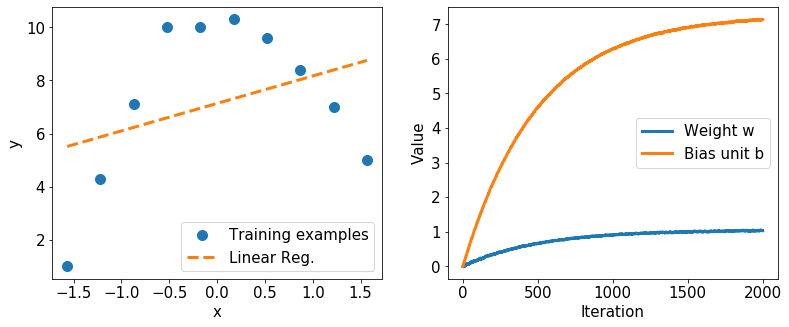

In [31]:
print('Final Parameters:', model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
#plt.savefig('ch13-linreg-1.pdf')

plt.show()